### Downloading the Price datasets


##### TVL from DeFi Lama
BTC: https://defillama.com/chain/Bitcoin <br>
ETH: https://defillama.com/chain/Ethereum <br>
SOL: https://defillama.com/chain/Solana

##### Wikipedia Page Views
ALL: https://pageviews.wmcloud.org/

### **DEPENDENCIES**

In [1]:
# Basic Stack 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
import importlib

# Changing the working directory
path = ('P:/6. DSMA/99. Thesis/Github/thesis')
os.chdir(path)

# Import the module
sys.path.append('P:/6. DSMA/99. Thesis/Github/thesis/scripts')
import pipeline_crypto_prices
from pipeline_crypto_prices import get_prices
#from camel import thesis_add_index
import camel
import sentiment_analyzer_v2
importlib.reload(pipeline_crypto_prices)
importlib.reload(camel)
importlib.reload(sentiment_analyzer_v2)

[scatterd] >WARNING> From C:\Users\mulle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\losses.py:2976: The name tf.losses.sparse_softmax_cross_entropy is deprecated. Please use tf.compat.v1.losses.sparse_softmax_cross_entropy instead.



<module 'sentiment_analyzer_v2' from 'P:\\6. DSMA/99. Thesis/Github/thesis/scripts\\sentiment_analyzer_v2.py'>

### **RAW DATA**

##### 1. CRYPTO, INDEX, STOCK, AND VIX

In [2]:
btc = get_prices(start_date='2018-01-01')
eth = get_prices('ETH-USD', start_date='2018-01-01')
sol = get_prices('SOL-USD', start_date='2018-01-01')
snp = get_prices('SNP', start_date='2018-01-01', percent_change=True, index=True)
dow = get_prices('Dow', start_date='2018-01-01', percent_change=True, index=True)
vix = get_prices('Vix', start_date='2018-01-01', percent_change=True, index=True).drop('Vix_Volume', axis=1)
gold = get_prices('Gold', start_date='2018-01-01', percent_change=True, index=True)
oil = get_prices('Oil', start_date='2018-01-01', percent_change=True, index=True)
nvidia = get_prices('NVDA', start_date='2018-01-01', percent_change=True, index=True)

Data for BTC-USD from 2018-01-01 to 2024-07-15 has been downloaded successfully
Data for ETH-USD from 2018-01-01 to 2024-07-15 has been downloaded successfully
Data for SOL-USD from 2018-01-01 to 2024-07-15 has been downloaded successfully
Data for SNP from 2018-01-01 to 2024-07-15 has been downloaded successfully
Data for Dow from 2018-01-01 to 2024-07-15 has been downloaded successfully
Data for Vix from 2018-01-01 to 2024-07-15 has been downloaded successfully


P:\6. DSMA/99. Thesis/Github/thesis/scripts\pipeline_crypto_prices.py:156: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Returns'] = df['Close'].pct_change()
P:\6. DSMA/99. Thesis/Github/thesis/scripts\pipeline_crypto_prices.py:159: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df = df.apply(lambda x: x.pct_change() if x.name not in ['Date','Returns'] else x)
P:\6. DSMA/99. Thesis/Github/thesis/scripts\pipeline_crypto_prices.py:156: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values

Data for Gold from 2018-01-01 to 2024-07-15 has been downloaded successfully
Data for Oil from 2018-01-01 to 2024-07-15 has been downloaded successfully
Data for NVDA from 2018-01-01 to 2024-07-15 has been downloaded successfully


In [3]:
Index = pd.merge(snp, dow, on='Date')
Index = pd.merge(Index, vix, on='Date')
Index = pd.merge(Index, gold, on='Date')
Index = pd.merge(Index, oil, on='Date')
Index = pd.merge(Index, nvidia, on='Date')

Index = Index.dropna()
Index.tail(4)

,Date,SNP_Returns,SNP_Volume,Dow_Returns,Dow_Volume,Vix_Returns,Gold_Returns,Gold_Volume,Oil_Returns,Oil_Volume,NVDA_Returns,NVDA_Volume
2380,2024-07-09,0.000741,0.014832,-0.001342,0.008624,0.011318,0.002081,-0.859375,-0.011175,0.180920,0.024805,0.200647
2381,2024-07-10,0.010208,0.031915,0.010928,-0.075344,0.027178,0.005127,1.111111,0.008476,0.124628,0.026869,-0.127513
2382,2024-07-11,-0.008763,0.205285,0.000815,0.081842,0.005447,0.018042,2.789474,0.006334,-0.030534,-0.055667,0.505281
2383,2024-07-12,0.005517,-0.079750,0.006217,-0.098885,-0.035604,-0.000414,0.000000,-0.004963,0.000000,0.014443,-0.327335


##### 2. GTRENDS AND WIKIPEDIA

1. Wikipedia
https://pageviews.wmcloud.org/?project=en.wikipedia.org&platform=all-access&agent=user&redirects=0&start=2018-01-01&end=2024-07-09&pages=Bitcoin|Solana|Ethereum|Cryptocurrency|Crypto|Blockchain#

2. Google Trends
https://trends.google.com/trends/explore?date=2024-01-01%202024-07-08&q=crypto&hl=en

Weekly: https://trends.google.com/trends/explore?date=2018-01-01%202024-07-09&q=crypto&hl=en

// Below code loads in all Google Trends Datasets, and the Wikipedia data set and merges them all together

In [4]:
#Gtrends Data
g_btc = pd.read_csv('data/raw/ext/daily/btc_gtrends.csv', header=1)
g_btc.rename(columns={'bitcoin: (Worldwide)': 'BTC_Gtrends'}, inplace=True)
g_eth = pd.read_csv('data/raw/ext/daily/eth_gtrends.csv', header=1)
g_eth.rename(columns={'ethereum: (Worldwide)': 'ETH_Gtrends'}, inplace=True)
g_sol = pd.read_csv('data/raw/ext/daily/sol_gtrends.csv', header=1)
g_sol.rename(columns={'solana: (Worldwide)': 'SOL_Gtrends'}, inplace=True)
g_crypto = pd.read_csv('data/raw/ext/daily/crypto_gtrends.csv', header=1)
g_crypto.rename(columns={'crypto: (Worldwide)': 'Crypto_Gtrends'}, inplace=True)

# Merging all trends data
all_gtrends = pd.merge(g_btc, g_eth, on='Day')
all_gtrends = pd.merge(all_gtrends, g_sol, on='Day')
all_gtrends = pd.merge(all_gtrends, g_crypto, on='Day')
all_gtrends['Total_Gtrends'] = all_gtrends.BTC_Gtrends + all_gtrends.ETH_Gtrends + all_gtrends.SOL_Gtrends + all_gtrends.Crypto_Gtrends
all_gtrends = all_gtrends[['Day', 'Total_Gtrends']]

print(f'Minimum Date: {all_gtrends.Day.min()}')
print(f'Maximum Date: {all_gtrends.Day.max()}')

Minimum Date: 2024-01-01
Maximum Date: 2024-07-14


In [5]:
# Wikipedia Data
wp = pd.read_csv('data/raw/ext/daily/wp.csv')
wp['Total_WP'] = wp['Bitcoin'] + wp['Solana'] + wp['Ethereum'] + wp['Cryptocurrency'] + wp['Crypto'] + wp['Blockchain']
wp = wp[['Date', 'Total_WP']]
#Final External 
all_ext = pd.merge(wp, all_gtrends, left_on='Date', right_on='Day')
all_ext.drop(['Day'], axis=1, inplace=True)
all_ext

# Apply percentage change to the columns
all_ext = camel.convert_to_percentage_change(all_ext, 'Date')
all_ext.Date = pd.to_datetime(all_ext.Date)
#all_ext_pca = camel.pca_v2(all_ext, blacklist=['Date'], n_components=4, n_feat=7)
#all_ext_pca['Date'] = all_ext['Date'].reset_index(drop=True)

print(f'Minimum Date: {all_ext.Date.min()}')
print(f'Maximum Date: {all_ext.Date.max()}')
#all_ext.tail(4)

Minimum Date: 2024-01-02 00:00:00
Maximum Date: 2024-07-13 00:00:00


##### 3. REDDIT SENTIMENT DATA

--__ Extra: https://www.aaii.com/sentimentsurvey/sent_results -> weekly historic sentiment figures

In [11]:
# Load in each dataset
btc_reddit = pd.read_csv('data/raw/reddit/BTC_R.csv')
eth_reddit = pd.read_csv('data/raw/reddit/ETH_R.csv')
sol_reddit = pd.read_csv('data/raw/reddit/SOL_R - Copy.csv')
sol_reddit['date_posted'] = pd.to_datetime(sol_reddit['date_posted'])



#Merge
#all_reddit = pd.concat([btc_reddit, eth_reddit, sol_reddit])
#all_reddit.date_posted = pd.to_datetime(all_reddit.date_posted, utc=True)
#all_reddit['date_posted'] = all_reddit['date_posted'].dt.strftime('%m/%d/%Y')
#all_reddit.date_posted = pd.to_datetime(all_reddit.date_posted)

#all_reddit = sentiment_analyzer.main(all_reddit)
#all_reddit.to_csv('data/processed/all_reddit_sen.csv')


btc_reddit_sen = sentiment_analyzer_v2.main(btc_reddit)
eth_reddit_sen = sentiment_analyzer_v2.main(eth_reddit)
sol_reddit_sen = sentiment_analyzer_v2.main(sol_reddit)

Pre-Processing Text...


Processing Text: 100%|██████████| 14959/14959 [00:39<00:00, 374.33it/s]


Applying Sentiment Analysis...


Analyzing Sentiment: 100%|██████████| 14959/14959 [00:05<00:00, 2720.85it/s]


Overall weighted average sentiment score: 0.1327
Pre-Processing Text...


Processing Text: 100%|██████████| 15540/15540 [00:38<00:00, 404.61it/s]


Applying Sentiment Analysis...


Analyzing Sentiment: 100%|██████████| 15540/15540 [00:05<00:00, 3069.19it/s]


Overall weighted average sentiment score: 0.2015
Pre-Processing Text...


Processing Text: 100%|██████████| 15589/15589 [00:37<00:00, 415.43it/s]


Applying Sentiment Analysis...


Analyzing Sentiment: 100%|██████████| 15589/15589 [00:04<00:00, 3140.72it/s]

Overall weighted average sentiment score: 0.1218


In [12]:
btc_reddit_sen.date = pd.to_datetime(btc_reddit_sen.date)
btc_reddit_sen = btc_reddit_sen[btc_reddit_sen['date'] >= '2024-02-01']

eth_reddit_sen.date = pd.to_datetime(eth_reddit_sen.date)
eth_reddit_sen = eth_reddit_sen[eth_reddit_sen['date'] >= '2024-02-01']

sol_reddit_sen.date = pd.to_datetime(sol_reddit_sen.date)
sol_reddit_sen = sol_reddit_sen[sol_reddit_sen['date'] >= '2024-02-01']

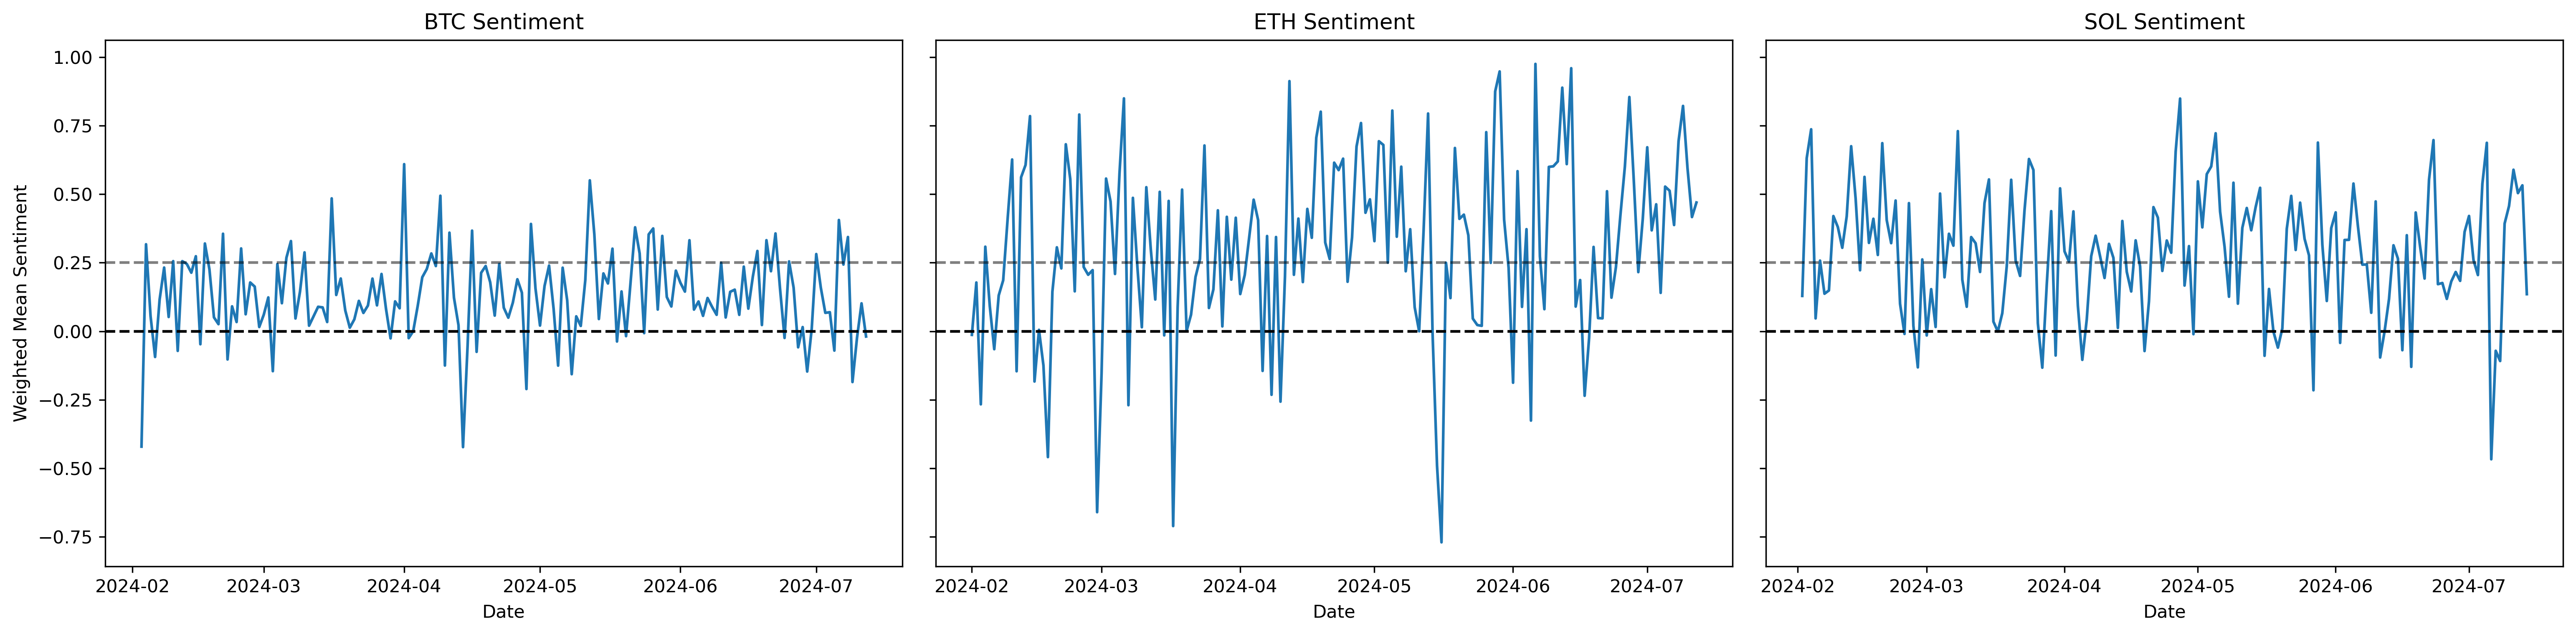

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True, dpi=310)  # Create a figure with 3 subplots side by side
titles = ['BTC Sentiment', 'ETH Sentiment', 'SOL Sentiment']  # Titles for each subplot

for idx, df in enumerate([btc_reddit_sen, eth_reddit_sen, sol_reddit_sen]):
    ax = axes[idx]
    ax.plot(df['date'], df['weighted_mean_sentiment'])
    ax.set_title(titles[idx])
    ax.axhline(y=0, color='black', linestyle='--')
    ax.axhline(y=0.25, color='black', linestyle='--', alpha=0.5)
    ax.set_xlabel('Date')
    if idx == 0:
        ax.set_ylabel('Weighted Mean Sentiment')  # Only label the y-axis on the first subplot

plt.tight_layout()
plt.show()

##### 4. TVL

In [14]:
btc_tvl = pd.read_csv('data/raw/tvl/btc_tvl.csv')
eth_tvl = pd.read_csv('data/raw/tvl/eth_tvl.csv')
sol_tvl = pd.read_csv('data/raw/tvl/sol_tvl.csv')

def tvl_pro(df):
    df = df[:1]
    df = df.melt(var_name='Date', value_name='TVL')
    df = df.drop(index=0).reset_index(drop=True)
    df.Date = pd.to_datetime(df.Date, dayfirst=True)
    return df

btc_tvl, eth_tvl, sol_tvl = tvl_pro(btc_tvl), tvl_pro(eth_tvl), tvl_pro(sol_tvl)
btc_tvl.TVL, eth_tvl.TVL, sol_tvl.TVL = btc_tvl['TVL'].pct_change(), eth_tvl['TVL'].pct_change(), sol_tvl['TVL'].pct_change()

btc_tvl.tail(4)


C:\Users\mulle\AppData\Local\Temp\ipykernel_33256\1321332755.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  btc_tvl.TVL, eth_tvl.TVL, sol_tvl.TVL = btc_tvl['TVL'].pct_change(), eth_tvl['TVL'].pct_change(), sol_tvl['TVL'].pct_change()


,Date,TVL
1207,2024-07-11,-0.004617
1208,2024-07-12,-0.000278
1209,2024-07-13,0.007151
1210,2024-07-14,0.037597


### **PROCESSING DATA**

#### 1. TECHNICAL ANALYSIS & PCA

**Input:** 
1. BTC, ETH, and SOL Price Data

**Output:** 
1. Dataframe with all technical indicators for all cryptos condensed to 4 columns
2. Seperate dataframe per crypto with its own Technical Indicators and Trend Determinisitc Technical Indicators


In [15]:
# Make a copy of the dataframe to avoid modifying the original
btc_1 = btc.copy()
eth_1 = eth.copy()
sol_1 = sol.copy()

# Apply technical analysis
btc_1 = camel.technical_analysis(btc, price_col = 'Close', hold_strat=False, only_td=True)
eth_1 = camel.technical_analysis(eth, price_col = 'Close', hold_strat=False, only_td=True)
sol_1 = camel.technical_analysis(sol_1, price_col = 'Close', hold_strat=False, only_td=True)

##### Dimensionality Reduction

In [ ]:
# Apply first PCA per dataset
btc_pca = camel.pca_v2(btc_1, blacklist=['Date', 'Close'], n_components=4, n_feat=7, show_explained_variance = False, show_biplot=False)
eth_pca = camel.pca_v2(eth_1, blacklist=['Date', 'Close'], n_components=4, n_feat=7, show_explained_variance = False, show_biplot=False)
sol_pca = camel.pca_v2(sol_1, blacklist=['Date', 'Close'], n_components=4, n_feat=7, show_explained_variance = False, show_biplot=False)

# Apply another round of PCA for combined database.
btc_pca['Date'] = btc_1['Date'].reset_index(drop=True)
eth_pca['Date'] = eth_1['Date'].reset_index(drop=True)
sol_pca['Date'] = sol_1['Date'].reset_index(drop=True)

#Merge all and add suffixes
btc_pca = btc_pca.rename(columns={'PC1': 'PC1_btc', 'PC2': 'PC2_btc', 'PC3': 'PC3_btc', 'PC4': 'PC4_btc'})
eth_pca = eth_pca.rename(columns={'PC1': 'PC1_eth', 'PC2': 'PC2_eth', 'PC3': 'PC3_eth', 'PC4': 'PC4_eth'})
sol_pca = sol_pca.rename(columns={'PC1': 'PC1_sol', 'PC2': 'PC2_sol', 'PC3': 'PC3_sol', 'PC4': 'PC4_sol'})

pca = pd.merge(btc_pca, eth_pca, on='Date')
pca = pd.merge(pca, sol_pca, on='Date')

pca = camel.pca_v2(pca, blacklist=['Date'], n_components=4, n_feat=7, show_explained_variance = False, show_biplot=False)
## This dataset has full technical indicators compressed into 4 variables with 77% explained

pca['Date'] = btc_1['Date'].reset_index(drop=True)

pca

#### Merging

In [16]:
btc_m = pd.merge(btc_1, Index, on='Date')
btc_m = pd.merge(btc_m, all_ext, on='Date')
btc_m = pd.merge(btc_m, btc_reddit_sen, left_on='Date', right_on='date')
btc_m = pd.merge(btc_m, btc_tvl, on='Date')

eth_m = pd.merge(eth_1, Index, on='Date')
eth_m = pd.merge(eth_m, all_ext, on='Date')
eth_m = pd.merge(eth_m, eth_reddit_sen, left_on='Date', right_on='date')
eth_m = pd.merge(eth_m, eth_tvl, on='Date')

sol_m = pd.merge(sol_1, Index, on='Date')
sol_m = pd.merge(sol_m, all_ext, on='Date')
sol_m = pd.merge(sol_m, sol_reddit_sen, left_on='Date', right_on='date')
sol_m = pd.merge(sol_m, sol_tvl, on='Date')

btc_m = camel.thesis_dv(btc_m, hold_strat=False)
btc_m.to_csv('data/processed/camel_v3_btc.csv')

eth_m = camel.thesis_dv(eth_m, hold_strat=False)
eth_m.to_csv('data/processed/camel_v3_eth.csv')

sol_m = camel.thesis_dv(sol_m, hold_strat=False)
sol_m.to_csv('data/processed/camel_v3_sol.csv')

In [18]:
btc_m

,Date,High,Low,Close,Volume,Returns,MA_td,3MA_td,%K_td,%D_td,...,NVDA_Returns,NVDA_Volume,Total_WP,Total_Gtrends,date,weighted_mean_sentiment,unweighted_mean_sentiment,ups,TVL,Indicator
0,2024-02-03,43359.941406,42890.808594,42992.250000,-0.399627,-0.004483,1,1,0,1,...,0.000000,0.000000,-0.009118,-0.114035,2024-02-03,-0.420672,-0.246525,1415,-0.002535,Sell
1,2024-02-04,43097.644531,42374.832031,42583.582031,0.325266,-0.009506,0,0,0,0,...,0.000000,0.000000,0.073535,0.019802,2024-02-04,0.317289,0.324842,2578,-0.008993,Buy
2,2024-02-05,43494.250000,42264.816406,42658.667969,0.264370,0.001763,0,0,0,0,...,0.047944,0.427003,0.060539,0.077670,2024-02-05,0.055301,0.166072,7037,-0.010539,Buy
3,2024-02-06,43344.148438,42529.019531,43084.671875,-0.102429,0.009986,1,1,1,0,...,-0.015996,0.004460,0.221910,0.072072,2024-02-06,-0.093616,0.204164,11204,-0.002255,Buy
4,2024-02-07,44341.949219,42775.957031,44318.222656,0.257649,0.028631,1,1,1,1,...,0.027498,-0.274532,-0.180723,-0.058824,2024-02-07,0.115744,0.286744,10555,0.018552,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2024-07-08,58131.335938,54321.019531,56705.097656,0.934777,0.015327,0,0,1,1,...,0.018835,0.109725,0.091588,0.079646,2024-07-08,0.343775,0.302847,4747,-0.021147,Buy
156,2024-07-09,58239.195313,56316.875000,58009.226563,-0.299668,0.022998,0,0,1,0,...,0.024805,0.200647,0.032696,-0.040984,2024-07-09,-0.185065,0.179183,7717,-0.212120,Sell
157,2024-07-10,59359.433594,57178.414063,57742.496094,-0.060118,-0.004598,0,0,0,1,...,0.026869,-0.127513,0.072966,0.017094,2024-07-10,-0.023848,0.200915,6680,0.018463,Sell
158,2024-07-11,59299.433594,57120.378906,57344.914063,0.096753,-0.006885,0,0,0,1,...,-0.055667,0.505281,0.062194,0.008403,2024-07-11,0.101813,0.239928,10278,-0.004617,Buy
